Decent Small Loan Model; Fit for Usage. The primary issue at the end of the day, the reason for this model not being used, is because of its relatively poor accuracy and slight bias in results (towards 1).

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Dataset 2.gzip', low_memory = False)

In [3]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(1), object(35)
memory usage: 3.1+ GB


In [5]:
list(df.columns)

['Unnamed: 0',
 'id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_join

In [6]:
df['grade'].head()

0    B
1    C
2    C
3    C
4    B
Name: grade, dtype: object

In [7]:
df['grade'].value_counts()

B    857573
C    802280
A    656302
D    416280
E    139036
F     41836
G     12185
Name: grade, dtype: int64

In [8]:
df['sub_grade'].head()

0    B2
1    C4
2    C5
3    C1
4    B5
Name: sub_grade, dtype: object

In [9]:
df['sub_grade'].value_counts()

B4    185188
B5    181856
C1    179073
B2    164880
B1    163455
B3    162194
C2    161790
C3    159015
A4    158426
A5    157156
C4    153184
C5    149218
A1    133282
D2    108645
A3    106377
A2    101061
D1    100822
D3     83075
D4     67101
D5     56637
E1     34838
E2     30346
E3     27229
E5     23404
E4     23219
F1     13425
F2      9314
F3      7794
F4      6129
F5      5174
G1      4113
G2      2697
G3      2095
G4      1712
G5      1568
Name: sub_grade, dtype: int64

In [10]:
# Target Column

df['granted'] = df[''].apply(lambda grade: 0 if grade == 'C' or grade == 'D' else 1)

### Challenge

Detect if a potential borrower will get their loan approved

### Strategy

Given a dataset of existing borrowers, using only the features the lender would have had before granting the loan, detect the basis by which the lender assigns grades to the borrowers. Train a model using these features to predict the grade for a new borrower. Borrowers with top grades are low risk and will likely get their loan approved while borrowers with poor grades are high risk and whose loan application will likely be rejected.

In [11]:
# Selecting Features (these are features known to the lender before the loan is issued)

df = df[['annual_inc',
         'application_type',
         'dti',
         'earliest_cr_line',
         'emp_length',
         'emp_title',
         'fico_range_high', 
         'fico_range_low',
         'home_ownership',
         'num_sats',
         'mort_acc',
         'open_acc',
         'total_acc',
         'acc_now_delinq',
         'delinq_amnt',
         'pub_rec',
         'pub_rec_bankruptcies',
         'tax_liens',
         'purpose',
         'title',
         'loan_amnt',
         'funded_amnt', 
         'term',
         'granted']]

## EDA + Feature Engineering

In [12]:
df.head()

,annual_inc,application_type,dti,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,home_ownership,num_sats,...,delinq_amnt,pub_rec,pub_rec_bankruptcies,tax_liens,purpose,title,loan_amnt,funded_amnt,term,granted
0,24000.0,Individual,27.65,Jan-1985,10+ years,NaN,739.0,735.0,RENT,NaN,...,0.0,0.0,0.0,0.0,credit_card,Computer,5000.0,5000.0,36 months,1
1,30000.0,Individual,1.00,Apr-1999,< 1 year,Ryder,744.0,740.0,RENT,NaN,...,0.0,0.0,0.0,0.0,car,bike,2500.0,2500.0,60 months,0
2,12252.0,Individual,8.72,Nov-2001,10+ years,NaN,739.0,735.0,RENT,NaN,...,0.0,0.0,0.0,0.0,small_business,real estate business,2400.0,2400.0,36 months,0
3,49200.0,Individual,20.00,Feb-1996,10+ years,AIR RESOURCES BOARD,694.0,690.0,RENT,NaN,...,0.0,0.0,0.0,0.0,other,personel,10000.0,10000.0,36 months,0
4,80000.0,Individual,17.94,Jan-1996,1 year,University Medical Group,699.0,695.0,RENT,NaN,...,0.0,0.0,0.0,0.0,other,Personal,3000.0,3000.0,60 months,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   annual_inc            float64
 1   application_type      object 
 2   dti                   float64
 3   earliest_cr_line      object 
 4   emp_length            object 
 5   emp_title             object 
 6   fico_range_high       float64
 7   fico_range_low        float64
 8   home_ownership        object 
 9   num_sats              float64
 10  mort_acc              float64
 11  open_acc              float64
 12  total_acc             float64
 13  acc_now_delinq        float64
 14  delinq_amnt           float64
 15  pub_rec               float64
 16  pub_rec_bankruptcies  float64
 17  tax_liens             float64
 18  purpose               object 
 19  title                 object 
 20  loan_amnt             float64
 21  funded_amnt           float64
 22  term                  object 
 23  granted

In [14]:
df.describe()

,annual_inc,dti,fico_range_high,fico_range_low,num_sats,mort_acc,open_acc,total_acc,acc_now_delinq,delinq_amnt,pub_rec,pub_rec_bankruptcies,tax_liens,loan_amnt,funded_amnt,granted
count,2.925488e+06,2.922384e+06,2.925492e+06,2.925492e+06,2.866902e+06,2.875462e+06,2.925463e+06,2.925463e+06,2.925463e+06,2.925463e+06,2.925463e+06,2.924127e+06,2.925387e+06,2.925492e+06,2.925492e+06,2.925493e+06
mean,7.993727e+04,1.929648e+01,7.045112e+02,7.005110e+02,1.168603e+01,1.512336e+00,1.167616e+01,2.401835e+01,3.230258e-03,9.907502e+00,1.762846e-01,1.226790e-01,3.614188e-02,1.535878e+04,1.535470e+04,5.834685e-01
std,1.117476e+05,1.571977e+01,3.376653e+01,3.376565e+01,5.736746e+00,1.869776e+00,5.733312e+00,1.207625e+01,6.142950e-02,6.480591e+02,5.243762e-01,3.531414e-01,3.324517e-01,9.478383e+03,9.477145e+03,4.929839e-01
min,0.000000e+00,-1.000000e+00,6.140000e+02,6.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+02,5.000000e+02,0.000000e+00
25%,4.700000e+04,1.208000e+01,6.790000e+02,6.750000e+02,8.000000e+00,0.000000e+00,8.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+03,8.000000e+03,0.000000e+00
50%,6.600000e+04,1.810000e+01,6.990000e+02,6.950000e+02,1.100000e+01,1.000000e+00,1.100000e+01,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+04,1.300000e+04,1.000000e+00
75%,9.500000e+04,2.488000e+01,7.240000e+02,7.200000e+02,1.500000e+01,2.000000e+00,1.500000e+01,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+04,2.000000e+04,1.000000e+00
max,1.100000e+08,9.990000e+02,8.500000e+02,8.450000e+02,1.040000e+02,9.400000e+01,1.040000e+02,1.760000e+02,1.400000e+01,2.499250e+05,8.600000e+01,1.200000e+01,8.500000e+01,4.000000e+04,4.000000e+04,1.000000e+00


In [15]:
df.isnull().sum()

annual_inc                   5
application_type             1
dti                       3109
earliest_cr_line            30
emp_length              205221
emp_title               264087
fico_range_high              1
fico_range_low               1
home_ownership               1
num_sats                 58591
mort_acc                 50031
open_acc                    30
total_acc                   30
acc_now_delinq              30
delinq_amnt                 30
pub_rec                     30
pub_rec_bankruptcies      1366
tax_liens                  106
purpose                      1
title                    23326
loan_amnt                    1
funded_amnt                  1
term                         1
granted                      0
dtype: int64

In [16]:
df.dropna().info() # have over 2.5 million datapoints after dropping null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585393 entries, 42536 to 2925492
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   annual_inc            float64
 1   application_type      object 
 2   dti                   float64
 3   earliest_cr_line      object 
 4   emp_length            object 
 5   emp_title             object 
 6   fico_range_high       float64
 7   fico_range_low        float64
 8   home_ownership        object 
 9   num_sats              float64
 10  mort_acc              float64
 11  open_acc              float64
 12  total_acc             float64
 13  acc_now_delinq        float64
 14  delinq_amnt           float64
 15  pub_rec               float64
 16  pub_rec_bankruptcies  float64
 17  tax_liens             float64
 18  purpose               object 
 19  title                 object 
 20  loan_amnt             float64
 21  funded_amnt           float64
 22  term                  object 
 23  gra

In [17]:
df.dropna(inplace = True) # permanently dropping all null vals

In [18]:
df.reset_index(inplace = True) # reset index
df.drop('index', axis = 1, inplace = True) # drop original index col

### Analyzing Object Features

In [19]:
df['application_type'].head()

0    Individual
1    Individual
2    Individual
3    Individual
4    Individual
Name: application_type, dtype: object

In [20]:
df['application_type'].value_counts()

Individual    2413191
Joint App      172202
Name: application_type, dtype: int64

In [21]:
df['application_type'] = df['application_type'].apply(lambda typ: 1 if typ == 'Individual' else 2)

In [22]:
df['earliest_cr_line']

0          Dec-2009
1          Aug-1995
2          Oct-1986
3          Sep-2003
4          Jun-1988
             ...   
2585388    Apr-1995
2585389    Sep-1993
2585390    May-1993
2585391    May-1990
2585392    Nov-1997
Name: earliest_cr_line, Length: 2585393, dtype: object

In [23]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[4:]))

In [24]:
df['emp_length'].head()

0      4 years
1      2 years
2    10+ years
3      3 years
4      4 years
Name: emp_length, dtype: object

In [25]:
df['emp_length'].value_counts()

10+ years    920406
2 years      252630
3 years      223809
< 1 year     218463
1 year       186430
5 years      175170
4 years      169146
6 years      125756
7 years      112095
8 years      109068
9 years       92420
Name: emp_length, dtype: int64

In [26]:
df['emp_length'] = df['emp_length'].apply(lambda x: '1 year' if str(x)[0] == '<' else x)
df['emp_length'] = df['emp_length'].apply(lambda x: int(str(x)[:2]))

In [27]:
df['emp_title'].head()

0                         Project Manager
1                     Surgical Technician
2     Team Leadern Customer Ops & Systems
3                        Systems Engineer
4    Assistant Director - Human Resources
Name: emp_title, dtype: object

In [28]:
df['emp_title'].value_counts()

Teacher                                   49749
Manager                                   43416
Owner                                     24327
Registered Nurse                          20531
Driver                                    19399
                                          ...  
Tri. State employment                         1
Team Leader Receiving                         1
Director, Transportation- Global Sales        1
Direct mail marketing manager                 1
Contact input                                 1
Name: emp_title, Length: 555179, dtype: int64

In [29]:
df.drop('emp_title', axis = 1, inplace = True)

In [30]:
df['home_ownership'].head()

0        RENT
1    MORTGAGE
2         OWN
3    MORTGAGE
4        RENT
Name: home_ownership, dtype: object

In [31]:
df['home_ownership'].value_counts()

MORTGAGE    1285224
RENT        1024360
OWN          273094
ANY            2630
NONE             44
OTHER            41
Name: home_ownership, dtype: int64

In [32]:
def home_ownership_nums(x):
    if x == 'OWN':
        return 3
    elif x == 'MORTGAGE':
        return 2
    elif x == 'RENT':
        return 1
    else:
        return 0

In [33]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: home_ownership_nums(x))

In [34]:
df['purpose'].head()

0    debt_consolidation
1      home_improvement
2    debt_consolidation
3    debt_consolidation
4    debt_consolidation
Name: purpose, dtype: object

In [35]:
df['title'].head()

0                                No Regrets
1                             For The House
2                        Debt Consolidation
3    Debt Consolidation and Credit Transfer
4                        Debt consolidation
Name: title, dtype: object

In [36]:
df['purpose'].value_counts()

debt_consolidation    1458597
credit_card            619725
home_improvement       167636
other                  152901
major_purchase          54226
medical                 29905
car                     24999
small_business          23829
vacation                17571
house                   16822
moving                  16665
renewable_energy         1479
wedding                  1036
educational                 2
Name: purpose, dtype: int64

In [37]:
df['title'].value_counts()

Debt consolidation         1380158
Credit card refinancing     588521
Home improvement            160699
Other                       147770
Major purchase               51955
                            ...   
My Debt Consolodation            1
Amazon Visa payoff Loan          1
Try this                         1
able to sleep at night           1
Credit Card/Auto Repair          1
Name: title, Length: 39219, dtype: int64

In [38]:
df.drop('purpose', axis = 1, inplace = True) # since the purpose and title cols are quite similar

In [39]:
def title_nums(x):
    if x == 'Debt consolidation':
        return 3
    elif x == 'Credit card refinancing':
        return 2
    elif x == 'Home Improvement':
        return 1
    else:
        return 0

In [40]:
df['title'] = df['title'].apply(lambda x: title_nums(x))

In [41]:
df['term'].head()

0     36 months
1     36 months
2     36 months
3     36 months
4     36 months
Name: term, dtype: object

In [42]:
df['term'].value_counts()

 36 months    1801864
 60 months     783529
Name: term, dtype: int64

In [43]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

<AxesSubplot:>

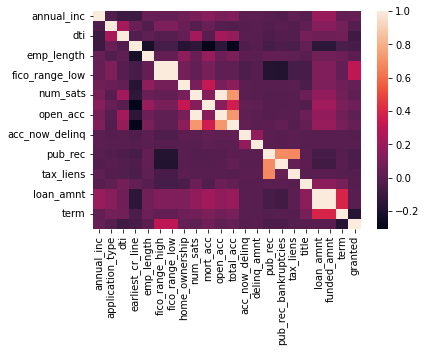

In [44]:
sns.heatmap(df.corr())

In [45]:
from sklearn.model_selection import train_test_split

In [63]:
feats = list(df.columns)
feats.remove('granted')
X = df.loc[:500000][feats]
y = df.loc[:500000]['granted']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression()

In [68]:
model.fit(X_train, y_train)

C:\Users\sirki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
predictions = model.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix, classification_report

In [71]:
print(confusion_matrix(predictions, y_test))

[[25095 13791]
 [17826 43289]]


In [72]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61     38886
           1       0.76      0.71      0.73     61115

    accuracy                           0.68    100001
   macro avg       0.67      0.68      0.67    100001
weighted avg       0.69      0.68      0.69    100001



In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
rfc_pred = rfc.predict(X_test)

In [75]:
print(confusion_matrix(y_test,rfc_pred))

[[29100 13821]
 [16104 40976]]


In [76]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61     38886
           1       0.76      0.71      0.73     61115

    accuracy                           0.68    100001
   macro avg       0.67      0.68      0.67    100001
weighted avg       0.69      0.68      0.69    100001

